In [95]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [4]:
# Get the Data

rainfall = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-07/rainfall.csv')
temperature = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-07/temperature.csv')


In [5]:
# IF YOU USE THIS DATA PLEASE BE CAUTIOUS WITH INTERPRETATION
nasa_fire = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-07/MODIS_C6_Australia_and_New_Zealand_7d.csv')

# For JSON File of fires
url = "http://www.rfs.nsw.gov.au/feeds/majorIncidents.json"


In [6]:
rainfall.tail()

,station_code,city_name,year,month,day,rainfall,period,quality,lat,long,station_name
179268,86232,Melbourne,2020,1,2,0.0,NaN,N,-37.83,144.98,Melbourne Botanical Gardens
179269,86232,Melbourne,2020,1,3,0.0,NaN,N,-37.83,144.98,Melbourne Botanical Gardens
179270,86232,Melbourne,2020,1,4,0.0,NaN,N,-37.83,144.98,Melbourne Botanical Gardens
179271,86232,Melbourne,2020,1,5,6.0,1.0,N,-37.83,144.98,Melbourne Botanical Gardens
179272,86232,Melbourne,2020,1,6,7.4,1.0,N,-37.83,144.98,Melbourne Botanical Gardens


## Temperatures

In [7]:
temperature.head()

,city_name,date,temperature,temp_type,site_name
0,PERTH,1910-01-01,26.7,max,PERTH AIRPORT
1,PERTH,1910-01-02,27.0,max,PERTH AIRPORT
2,PERTH,1910-01-03,27.5,max,PERTH AIRPORT
3,PERTH,1910-01-04,24.0,max,PERTH AIRPORT
4,PERTH,1910-01-05,24.8,max,PERTH AIRPORT


In [92]:
temperature['city_name'].unique()

array(['PERTH', 'PORT', 'KENT', 'BRISBANE', 'SYDNEY', 'CANBERRA',
       'MELBOURNE'], dtype=object)

In [93]:
temperature['site_name'].unique()

array(['PERTH AIRPORT', 'PORT LINCOLN AWS', 'KENT TOWN', 'BRISBANE AERO',
       'SYDNEY (OBSERVATORY HILL)', 'CANBERRA AIRPORT',
       'MELBOURNE (OLYMPIC PARK)'], dtype=object)

In [94]:
temperature['temp_type'].unique()

array(['max', 'min'], dtype=object)

In [111]:
temperature['year'] = pd.to_datetime(temperature['date']).dt.year

/home/elite/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/home/elite/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
No handles with labels found to put in legend.


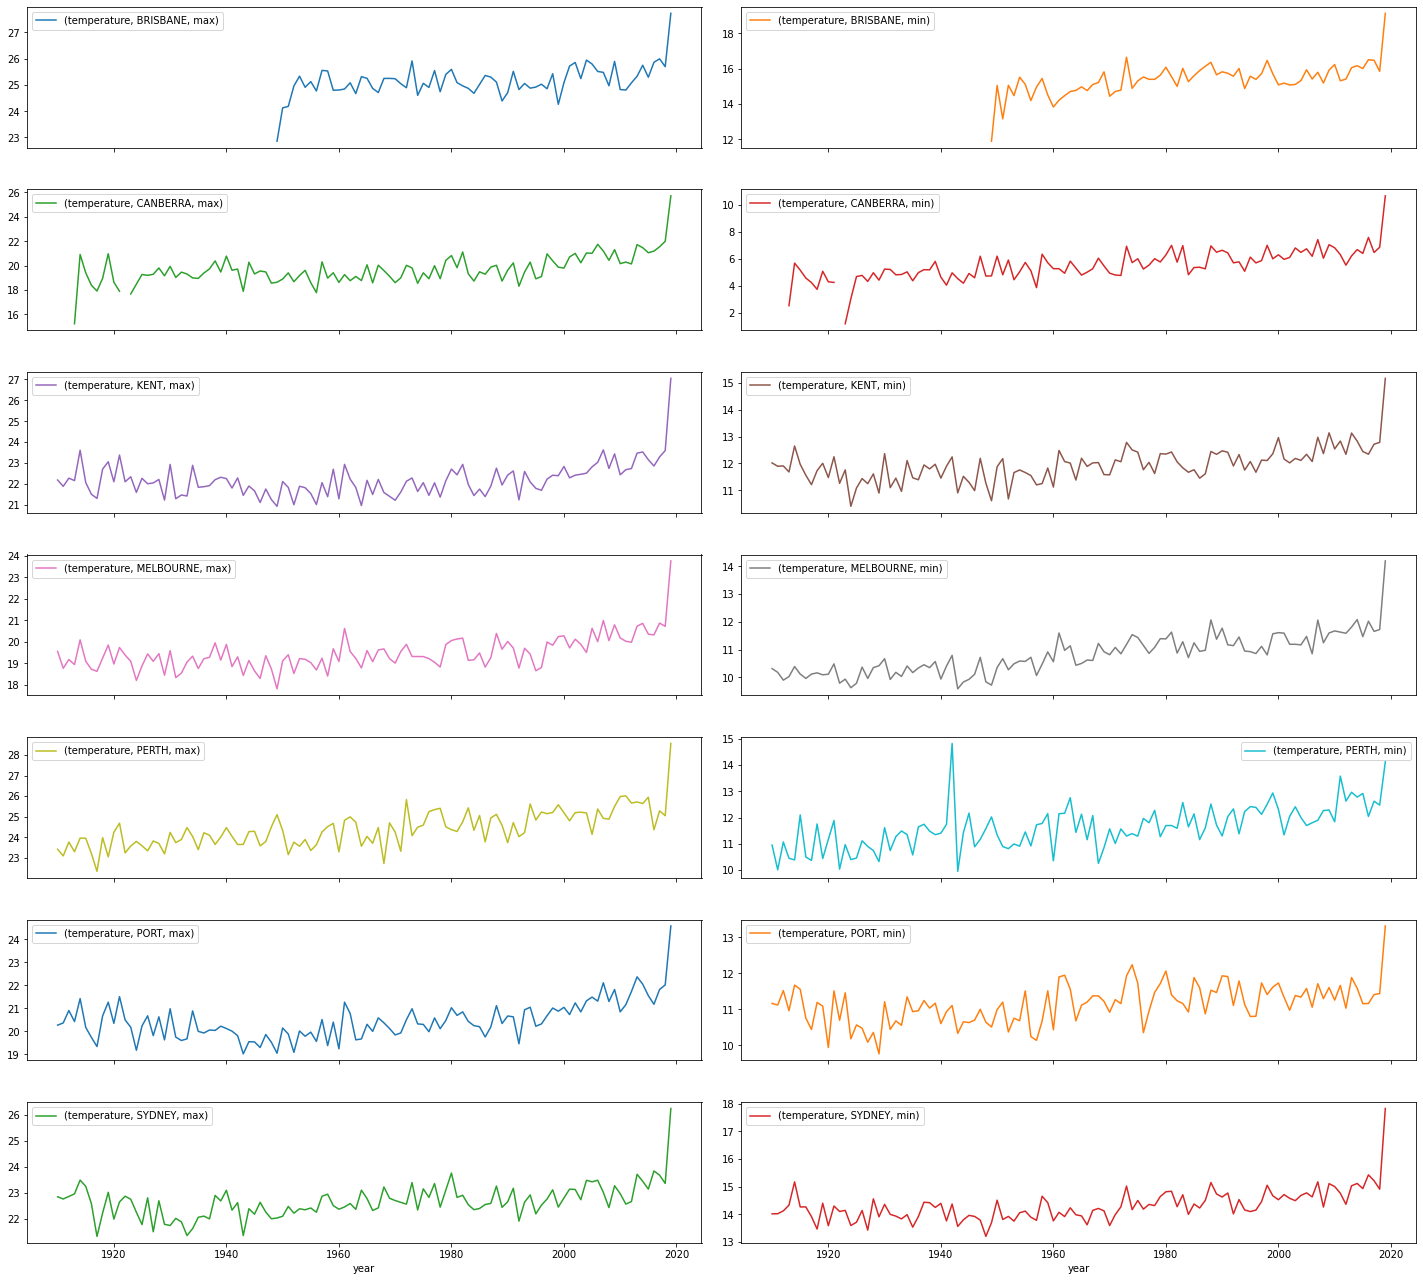

In [142]:
temperature_pivot = temperature.pivot_table(index='date', columns=['city_name','temp_type'], values=['temperature'], aggfunc='mean')
temperature_pivot['year'] = pd.DatetimeIndex(temperature_pivot.index).year
temperature_pivot_grouped = temperature_pivot.groupby(by='year').mean()
temperature_pivot_grouped.plot(kind='line', subplots=True, rot=0, figsize=(20, 20), layout=(8,2))
plt.tight_layout()
plt.legend(loc='upper left')


In [137]:
temperature_pivot.index

Index(['1910-01-01', '1910-01-02', '1910-01-03', '1910-01-04', '1910-01-05',
       '1910-01-06', '1910-01-07', '1910-01-08', '1910-01-09', '1910-01-10',
       ...
       '2019-05-22', '2019-05-23', '2019-05-24', '2019-05-25', '2019-05-26',
       '2019-05-27', '2019-05-28', '2019-05-29', '2019-05-30', '2019-05-31'],
      dtype='object', name='date', length=39963)

## Bush fires

In [8]:
nasa_fire.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,confidence,version,bright_t31,frp,daynight
0,-32.052,151.387,328.0,1.6,1.2,2019-12-29,25,T,59,6.0NRT,303.2,38.8,D
1,-32.054,151.402,327.2,1.6,1.2,2019-12-29,25,T,54,6.0NRT,301.4,39.3,D
2,-32.149,151.337,327.1,1.6,1.2,2019-12-29,25,T,32,6.0NRT,303.9,32.9,D
3,-32.153,151.370,331.4,1.6,1.2,2019-12-29,25,T,62,6.0NRT,304.2,39.5,D
4,-32.160,151.334,335.5,1.6,1.2,2019-12-29,25,T,76,6.0NRT,303.6,55.5,D


<AxesSubplot:>

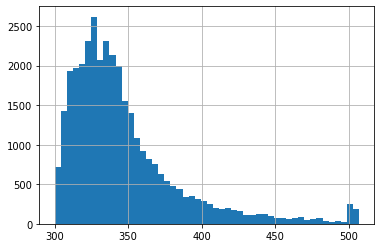

In [83]:
nasa_fire['brightness'].hist(bins=50)

In [87]:
nasa_fire['acq_date'].unique()

array(['2019-12-29', '2019-12-30', '2019-12-31', '2020-01-01',
       '2020-01-02', '2020-01-03', '2020-01-04', '2020-01-05'],
      dtype=object)

<AxesSubplot:>

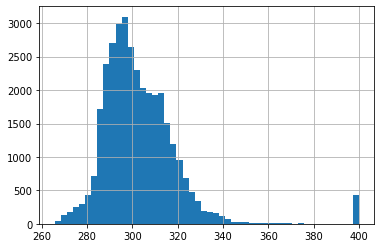

In [89]:
nasa_fire['bright_t31'].hist(bins=50)

<AxesSubplot:>

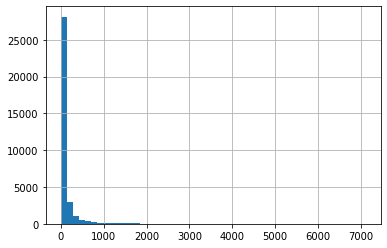

In [91]:
nasa_fire['frp'].hist(bins=50)

In [19]:
# Get the shape file
shape_file = gpd.datasets.get_path("naturalearth_lowres")

# Read shape file
countries = gpd.read_file(shape_file)

# Filter the appropriate country
aus_map = countries[(countries['iso_a3'] == 'AUS') \
                    | (countries['name'] == 'New Zealand') \
                    | (countries['name'] == 'New Caledonia') \
                    | (countries['name'] == 'Papua New Guinea')]

/home/elite/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


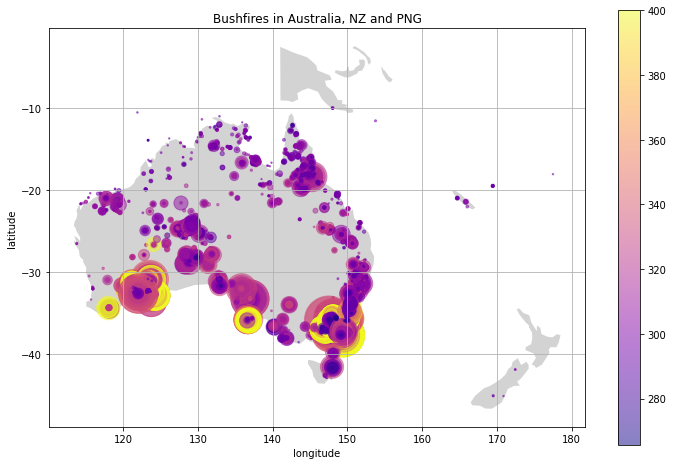

In [82]:
# Plot the fires' location on the map
fig, ax = plt.subplots(figsize=(12,8))
aus_map.plot(color="lightgrey", ax=ax)

nasa_fire.plot(x="longitude", y="latitude", kind="scatter", \
               s=nasa_fire["frp"]/3,c=nasa_fire["bright_t31"],\
               colormap="plasma", alpha=0.5, ax=ax)
ax.grid()
ax.set_title("Bushfires in Australia, NZ and PNG");